# Playground

In [1]:
import sys
sys.path.append("modules/") # to make modules accessible

In [2]:
# importing accessible API
from modules.analyseSingingVoiceAcoustics import analyseSingingVoiceAcoustics

In [3]:
# CONTROLS
audioControls = {
    "targetSampleRate": 16000
    }

pitchControls = {
    "time_step": 0.01,  # time step between consecutive pitch measurements (in seconds)
    "pitch_floor": 75.0, # minimum pitch value to detect (in Hz), useful for filtering out low-frequency noise
    "max_number_of_candidates": 15, # max number of pitch candidates per frame to evaluate
    "very_accurate": False, # increases accuracy at the cost of performance
    "silence_threshold": 0.01, # energy threshold to distinguish silence from voiced parts
    "voicing_threshold": 0.35, # threshold for deciding whether a frame is voiced
    "octave_cost": 0.05, # cost for selecting a pitch candidate an octave apart from the previous one
    "octave_jump_cost": 0.35, # penalty for sudden jumps between octaves
    "voiced_unvoiced_cost": 0.4, # cost for transitioning between voiced and unvoiced frames
    "pitch_ceiling": 600 # maximum pitch to detect (in hz)
    }

intensityControls = {
    "minimum_pitch": 75.0,  # min pitch (in Hz) used for intensity calculation; helps focus on voiced parts
    "time_step": 0.01,      # time step between consecutive intensity measurements (in seconds)
    "subtract_mean": False  # Whether to subtract the mean intensity; useful for normalization
}
SBEOnsetsControls = {
    "promsThreshold": None # 0 to 1; filter onsets with prominence above this threshold
}

In [4]:
asva = analyseSingingVoiceAcoustics(
    audioFp="./tmp/AS6_1.wav", 
    gtTxtFp="./tmp/AS6_1_gt.txt",
    hubertTxtFp="./tmp/06001_timestamps.txt",
    audioControls=audioControls, 
    pitchControls=pitchControls, 
    intensityControls=intensityControls, 
    SBEOnsetsControls=SBEOnsetsControls
).run(debugMode=True)
fig = asva.plot()

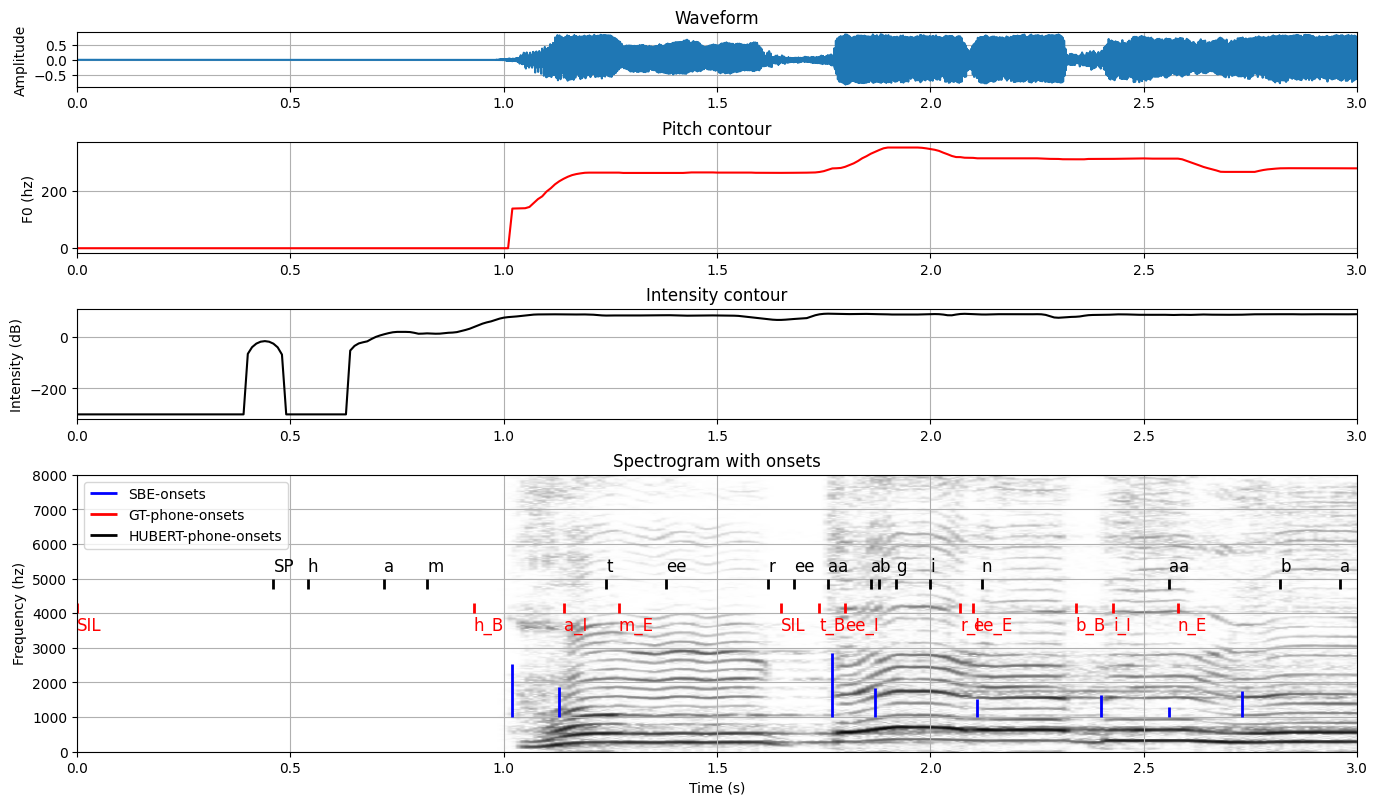

In [5]:
zoom = [0, 3] # sec
# Assuming `fig` was created previously
fig.axes[0].set_xlim(zoom[0], zoom[-1])  # Set xlim for the first axis
fig.axes[1].set_xlim(zoom[0], zoom[-1])  # Set for the second axis if needed, and so on
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.4)
display(fig)

In [6]:
asva.info()


INFO about FC <analyseSingingVoiceAcoustics>
---------------------------------------------

	To put together all the modules, specifically customised as per the needs of IIT-B DAPLAB team working on SRGM project
	
	inps
	----
	audioSignal: ndarray
		audio signal that needs to be analysed
	audioSr: int
		audio sampling rate
	controls: dict[dict]
		controls over various acoustic features computation

	outs
	----
	
	
	
---------------------------------------------

:: METHODS
  - test
  - validate
  - run
  - plot
  - save
  - info

:: INPS
  - audioFp [<class 'pathlib.PosixPath'>]
  - gtTxtFp [<class 'pathlib.PosixPath'>]
  - hubertTxtFp [<class 'pathlib.PosixPath'>]
  - audioControls [<class 'dict'>]
  - pitchControls [<class 'dict'>]
  - intensityControls [<class 'dict'>]
  - SBEOnsetsControls [<class 'dict'>]

:: DEBUGS
  - logLevel [<class 'str'>]
  - logFp [<class 'NoneType'>]
  - gtOnsets [<class 'numpy.ndarray'>]
  - gtPhones [<class 'numpy.ndarray'>]
  - hubertOnsets [<class 'nu